# Lista 6 - Teorema Central do Limite, ICs e Testes de Hipóteses

## Teorema Central do Limite e Distribuição Normal

**Conceito:** A distribuição das médias de variáveis aleatórias independentes e identicamente distribuídas segue a uma Normal.

Vamos fazer um experimento clássico para demonstrar na prática.

- Geraremos $n$ amostras de tamanho 100 de uma distribuição qualquer (utilizaremos uma Uniforme, mas funciona para qualquer distribuição).
- Calcularemos suas médias.
- Plotamos um histograma.
- Variaremos o tamanho de $n$ e repetiremos.

Vamos usar:
- $n=10$
- $n=20$
- $n=50$
- $n=100$
- $n=1000$

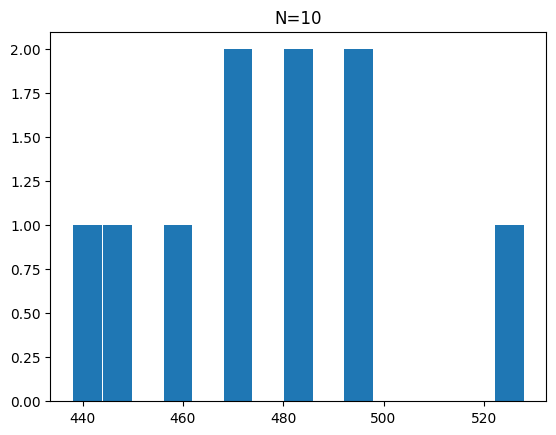

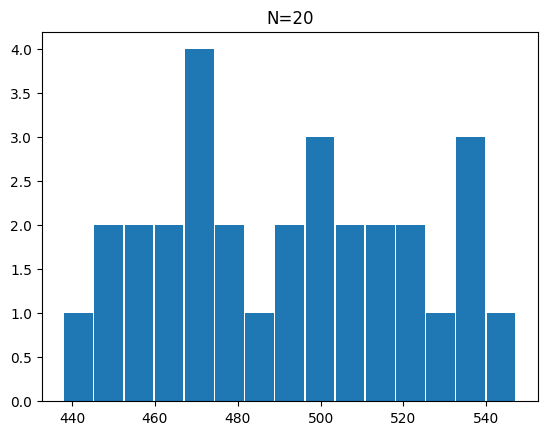

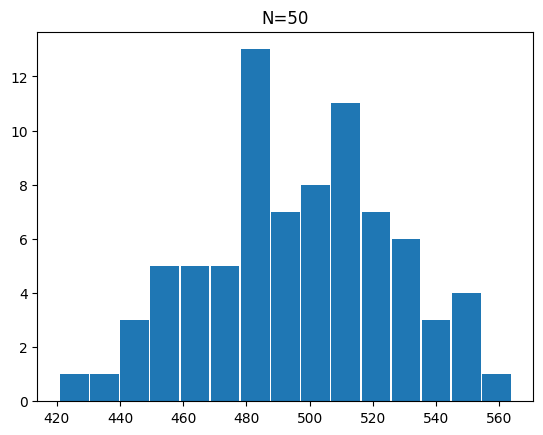

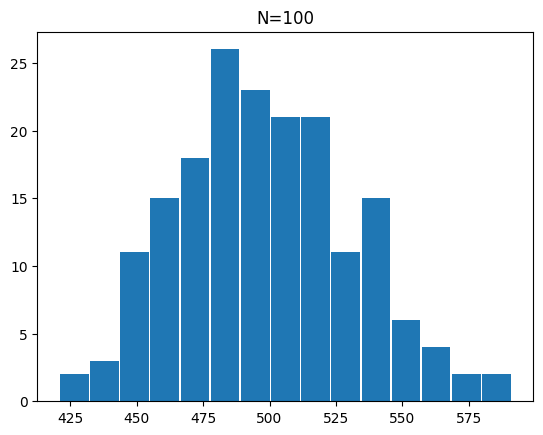

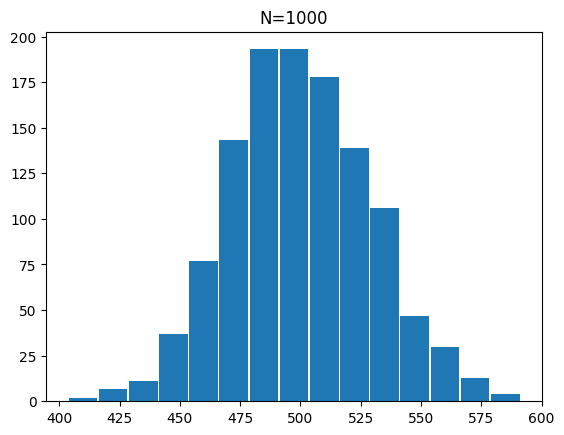

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal
from numpy.testing import assert_array_almost_equal
from numpy.testing import assert_array_equal
np.random.seed(23) # seed para reprodutibilidade


size = 100

medias = []
for n in [10, 20, 50, 100, 1000]:
  for _ in range(n):
    data = np.random.uniform(1, 1000, size)
    medias.append(data.mean())
  plt.hist(medias, bins=15, rwidth=0.95)
  plt.title('N={}'.format(n))
  plt.show()

Note que a medida que aumentamos o número de médias amostradas ($n$), o histograma fica cada vez mais similar a uma distribuição Normal.

**Está demonstrado o princípio do Teorema Central do Limite!**

Ao demonstrar o TCL, mostramos indiretamente porque a distribuição Normal é tão importante. Vamos agora, revisar e explorar a Normal um pouco mais.

Se as médias de variáveis aleatórias apresentam distribuição próxima a Normal, como podemos estimar probabilidades e fazer testes com base na Normal?

Uma distribuição Normal é definida por dois parâmetros:
- Média ($\mu$).
- Desvio padrão ($\sigma$), ou variância ($\sigma^2$).

Tendo esses valores de uma população e uma amostra com $n$ elementos, podemos normalizá-la de forma que os valores resultantes possuam uma distribuição Normal Gaussiana, ou seja, com $\mu=0$ e $\sigma^2=1$, denotada por Normal(0,1), ou ainda, N(0,1). Para fazer isso, utilizamos:

$$ Z = \frac {\bar X-\mu}{\sigma/\sqrt{n}}, $$

onde:
- $\bar{X}$: é a média encontrada em uma amostra de tamanho $n$.
- $\mu$: é a média da população da qual realizamos a amostra.
- $\sigma^2$: é a variância da população da qual realizamos a amostra.

Assim, temos:

$$Z \thicksim Normal(0,1)$$

Lembre-se que também sabemos que a variância do estimador da média é:

$$Var(\hat{\mu}) = \frac{\sigma^2}{n}$$

Assim:

$$\bar{X} \thicksim Normal\left(\mu, \frac{\sigma^2}{n}\right)$$

A Normal Gaussiana é de extrema importância, pois serve de base para definirmos probabilidades. Vamos ver um exemplo.

**Exemplo:** Dado que a população de homens de um país apresenta pesos distribuídos normalmente com média de 173lb e desvio-padrão de 30lb. Como podemos determinar a probabilidade de um homem escolhido aleatoriamente pesar mais de 180lb?

Nesse caso, temos:
- $\mu = 173$
- $\sigma = 30$
- $n = 1$

Vamos encontrar o valor de Z.

In [79]:
def z_obs(x, mu, sigma, n):
  z = (x - mu)/(sigma/np.sqrt(n))
  return z.round(2)

z_obs(180, 173, 30, 1)

0.23

Sabemos que $z$ é um valor de uma distribuição Normal com média 0 e variância 1.

Vamos então encontrar a probabilidade de obtermos um valor maior que $z$.

Para isso, estatísticos usam uma tabela com as probabilidades bem definidas. Cientistas de dados fazem assim:

In [80]:
import scipy.stats as ss

print(ss.distributions.norm.sf(0.23))

0.40904588485799415


Isso nos diz que a probabilidade de obtermos um valor maior que o valor de $z$ encontrado (0.23), na distribuição Normal(0,1) é 0.4090!

Logo, a probabilidade de um homem selecionado aleatoriamente pesar mais que 180lb é 0.4090!

E se quisermos calcular a probabilidade do peso médio de 36 homens selecionados aleatoriamente ser maior que 180lb?

A ideia é a mesma.

In [81]:
print(z_obs(180, 173, 30, 36))
print(ss.distributions.norm.sf(z_obs(180, 173, 30, 36)))

1.4
0.08075665923377107


Concluímos que há uma probabilidade de 0.4090 de UM indivíduo pesar mais que 180, porém a probabilidade da média do peso de 36 homens é de apenas 0.0808.

**É muito mais fácil um indivíduo se afastar da média, do que um grupo com 36 indivíduos.**

Note que escancaramos a influência do tamanho da amostra. Para uma mesma distribuição com os mesmos parâmetros, aumentar o tamanho da amostra significa se afastar da média na distribuição Z (note que o valor de $z$ para o caso com $n=36$ é superior ao caso com $n=1$ e a média da distribuição de Z é 0), porém significa que a probabilidade da média dos pesos ser superior a 180lb é muito menor.

## Exercício 1

Sabendo que os preços de bolsas de uma marca de grife seguem uma distribuição Normal com média 1100 reais e desvio-padrão de 420, altere o código abaixo para retornar a probabilidade de uma bolsa selecionada aleatoriamente custar mais que 1400 reais.

In [82]:
def prob(x, mu, sigma, n):
  # a função deve retornar um float:
  # a probabilidade de uma bolsa custar mais que 1400
  # P(X>1400)
  
  resposta = ss.distributions.norm.sf(x, mu, sigma)
  return resposta

In [83]:
p = prob(1400, 1100, 420, 1)
assert_equal(0.2375, p.round(4))

## Intervalos de Confiança

Vimos duas maneiras de construirmos intervalos de confiança para variáveis aleatórias:

- Usando o teorema central do limite.
- Usando *Bootstrap*.

Com baso no TCL e nas propriedades da distribuição Normal podemos definir intervalos de confiança. Basta definirmos o nível de confiança associado ao nosso intervalo e manipularmos a equação do TCL utilizada para encontrar $z$ de forma a isolar $\mu$ (parâmetro de interesse).

$$\begin{align}
0.95 = P(-z \le Z \le z)=P \left(-1.96 \le \frac {\bar X-\mu}{\sigma/\sqrt{n}} \le 1.96 \right) = P \left( \bar X - 1.96 \frac \sigma {\sqrt{n}} \le \mu \le \bar X + 1.96 \frac \sigma {\sqrt{n}}\right),
\end{align}$$

onde 1.96 é o valor de $z$ associado ao nível de confiança escolhido. Basicamente é o inverso do que estávamos fazendo. Ao invés de encontrarmos a probabilidade associada a um valor $z$, encontramos o valor $z$ associado a uma probabilidade pré-definida (nível de confiança).

## Exercício 2

**a) Qual a temperatura média do corpo humano?**

Os dados a seguir foram obtidos por pesquisadores da Universidade de Maryland que mediram 106 temperaturas do corpo humano. Construa um intervalo de 95% de confiança para a média. Utilize a equação acima.

In [84]:
data = np.array([98.6, 98.6, 98.0, 98.0, 99.0, 98.4, 98.4, 98.4, 98.4, 98.6, 98.6, 
                 98.8, 98.6, 97.0, 97.0, 98.8, 97.6, 97.7, 98.8, 98.0, 98.0, 98.3,
                 98.5, 97.3, 98.7, 97.4, 98.9, 98.6, 99.5, 97.5, 97.3, 97.6, 98.2,
                 99.6, 98.7, 99.4, 98.2, 98.0, 98.6, 98.6, 97.2, 98.4, 98.6, 98.2,
                 98.0, 97.8, 98.0, 98.4, 98.6, 98.6, 97.8, 99.0, 96.5, 97.6, 98.0,
                 96.9, 97.6, 97.1, 97.9, 98.4, 97.3, 98.0, 97.5, 97.6, 98.2, 98.5,
                 98.8, 98.7, 97.8, 98.0, 97.1, 97.4, 99.4, 98.4, 98.6, 98.4, 98.5,
                 98.6, 98.3, 98.7, 98.8, 99.1, 98.6, 97.9, 98.8, 98.0, 98.7, 98.5,
                 98.9, 98.4, 98.6, 97.1, 97.9, 98.8, 98.7, 97.6, 98.2, 99.2, 97.8,
                 98.0, 98.4, 97.8, 98.4, 97.4, 98.0, 97.0])

In [85]:
def ic(data):
  # altere a função para retornar uma tupla (LI, LS) com os limites do intervalo de confiança
  
  value = 1.96 * (np.std(data)) / np.sqrt(len(data))

  LI = data.mean() - value
  LS = data.mean() + value

  return (LI, LS)


In [86]:
(LI, LS) = ic(data)
assert_equal(98.08, LI.round(2))
assert_equal(98.32, LS.round(2))

**b) Bootstrap**

Suponha que você tenha apenas as 15 primeiras observações das temperaturas corporais. Um intervalo de confiança com poucos dados pode não ser muito aconselhável, pois não há garantias de que a sua amostra seja de fato representativa da sua população. Para contornar esse tipo de empecilho, é comum utilizarmos técnicas de amostragem que garantam estimativas confiáveis que reflitam a população de interesse. Uma das maneiras de realizarmos esse processo de amostragem é chamado de *Bootstrap* e consiste em realizar sub-amostras da amostra disponível, com reposição. Assim gera-se várias novas amostras com elementos que podem se repetir nessas novas amostras, mesmo que isso não ocorra na amostra original.

Nessa lista, não daremos muito enfoque na explicação do *Bootstrap*, apenas na revisão. Caso precise relembrar o método, sugerimos a revisão das aulas e listas de exercícios com *Bootstrap*.

ALTERE A FUNÇÃO ABAIXO PARA RETORNAR UM INTERVALO DE 95% DE CONFIANÇA PARA AS TEMPERATURAS CORPORAIS DOS 15 PRIMEIROS INDIVÍDUOS. UTILIZE 5000 SUB-AMOSTRAS DE TAMANHO IGUAL AO TAMANHO ORIGINAL (15).

Você pode utilizar _np.random.seed(i)_ para controlar a aleatoriedade da i-ésima iteração.

In [87]:
df = data[:15]

def bootstrap_mean(x):
  # OS PARÂMETROS INICIAIS PODEM SER ALTERADOS A SEU GOSTO
  # SUA FUNÇÃO DEVE RETORNAR UMA TUPLA COM OS LIMITES DO IC
  # (LI, LS)
  tam = len(x)
  values = np.zeros(10000)

  for i in range(10000):
    sample = np.random.choice(x, replace = True, size = tam) 
    values[i] = sample.mean()

  LI = np.percentile(values, 2.5)
  LS = np.percentile(values, 97.5)

  return(LI , LS)

In [88]:
(LI, LS) = bootstrap_mean(df)
assert_equal(97.97, LI.round(2))
assert_equal(98.55, LS.round(2))

## Testes de Hipóteses

Até o momento, vimos como realizar testes de hipóteses através de algumas metodologias diferentes. Podemos citar:

- Testes A/B: comparamos intervalos de confiança para o estimador da média (mediana), ou da diferença de médias e analisamos o boxplot. Nesse caso, a criação de intervalos de confiança pode ser via *bootstrap* ou via TLC.
- Testes de Permutação: embaralhamos a amostra retirando a influência de uma variável categórica e comparamos se a média se mantém.

Utilizando o conhecimento sobre testes de hipóteses, resolva as questões com o dataset a seguir.

In [89]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv', nrows=100)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exercício 3

Uma corretora de imóveis desconfia que exista uma diferença entre os preços médios de casas de acordo com o número de pisos (`floors`). Ela deseja comparar casas totalmente térreas (1 piso) e casas com mais de 1 piso. Realize um teste de permutação, respondendo as questões. 

1 - Definida as hipóteses:

$$H_0: \mu_{T} = \mu_{\bar{T}}$$

$$H_1: \mu_{T} \neq \mu_{\bar{T}}$$



**2 - Qual a estatística de teste?**

In [90]:
def t_obs(data):
  # deve retornar um valor apenas
  # os filtros aplicados sobre data devem estar dentro da função

  andarUnico = data[data["floors"] == 1]["price"]
  maisAndares = data[data["floors"] > 1]["price"]
  media =  andarUnico.mean() - maisAndares.mean()
  
  return media 

In [91]:
tobs = t_obs(data)
assert_equal(-53396.48, round(tobs, 2))

**3 - Faça o processo de shuffling e responda: Há diferença de preço significativa entre casas térreas e casas com mais de um andar?**

In [92]:
def shuffling(data):
  # realiza permutações entre os dados de maneira aleatória
  # atribuindo um preço a uma casa independente do número de andares
  # deve retornar uma tupla com os valores críticos

  filtroAndarUnico = (data['floors'] == 1)
  diferencas = np.zeros(5000)

  for i in range(5000):
    np.random.seed(i)
    np.random.shuffle(filtroAndarUnico.values)
    diferencas[i] = data[filtroAndarUnico]['price'].mean() - data[~filtroAndarUnico]['price'].mean() # andar unico - mais andares

  respota = np.percentile(diferencas,2.5), np.percentile(diferencas,97.5)
  
  return respota 

In [93]:
(c_inf, c_sup) = shuffling(data)
assert_equal(c_inf < -116000, True)
assert_equal(c_sup > 116000, True)

Por fim, conclua: Há diferença entre os preços de casas térreas e casas não térreas?

In [94]:
def resposta():
  # deve retornar True caso exista diferença e False caso contrário

  filtroAndarUnico = (data['floors'] == 1)
  diferencas = np.zeros(5000)

  for i in range(5000):
    np.random.seed(i)
    np.random.shuffle(filtroAndarUnico.values)
    diferencas[i] = data[filtroAndarUnico]['price'].mean() - data[~filtroAndarUnico]['price'].mean() # andar unico - mais andares

  tobs = t_obs(data)

  p_value = (diferencas > tobs).sum()/5000

  if(round(p_value,2) < 0.05):
    return True
  
  return False

In [95]:
assert_equal(resposta(), False)